<a href="https://colab.research.google.com/github/Aasthapriy44/ML_6A_003/blob/main/1BM22CS003_kmeansLAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

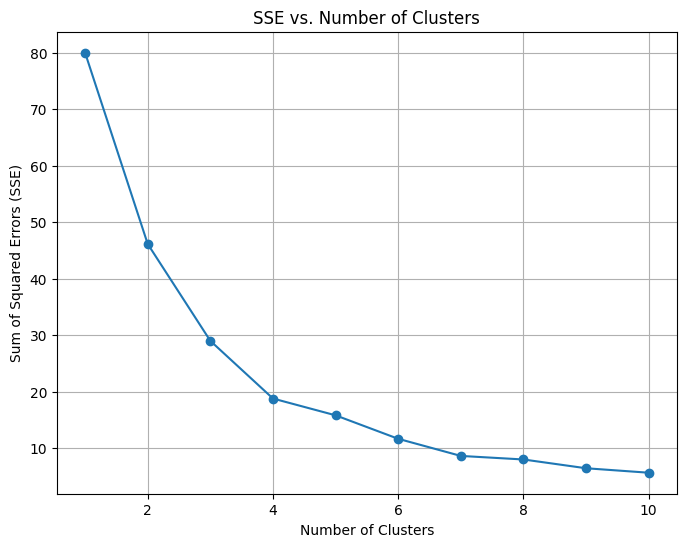

Mean Squared Error: 0.60


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


np.random.seed(42)
names = [f'Name{i}' for i in range(1, 51)]
ages = np.random.randint(18, 65, size=50)
incomes = np.random.randint(30000, 120000, size=50)

data = pd.DataFrame({'Name': names, 'Age': ages, 'Income': incomes})
data.to_csv('income.csv', index=False)

# Step 2: Load the data and prepare for clustering
df = pd.read_csv('income.csv')
X = df[['Age', 'Income']].values

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Step 6: Fit the KMeans model with the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Step 7: Predict cluster labels for the test set
y_pred = kmeans.predict(X_test_scaled)

# Step 8: Evaluate the model using Mean Squared Error (MSE) as a proxy for accuracy
# Note: Since this is unsupervised learning, traditional accuracy metrics don't apply.
# MSE is used here to measure the reconstruction error.
mse = mean_squared_error(X_test_scaled, kmeans.cluster_centers_[y_pred])
print(f'Mean Squared Error: {mse:.2f}')
